# **4. Analyze**

---

## **4.1 Prerequisites**



**Import libraries**

In [33]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [34]:
df = pd.read_csv('clean_lichess_games.csv', encoding = 'utf-8')
df

Unnamed: 0  rated  turns victory_status winner       white_id  \
0               0  False     13      outoftime  white       bourgris   
1               1   True     16         resign  black           a-00   
2               2   True     61           mate  white         ischia   
3               3   True     61           mate  white  daniamurashov   
4               4   True     95           mate  white      nik221107   
...           ...    ...    ...            ...    ...            ...   
19108       20053   True     24         resign  white        belcolt   
19109       20054   True     82           mate  black       jamboger   
19110       20055   True     35           mate  white       jamboger   
19111       20056   True    109         resign  white   marcodisogno   
19112       20057   True     78           mate  black       jamboger   

       white_rating            black_id  black_rating opening_eco  \
0              1500                a-00          1191         D10   
1              1322           skinnerua          1261         B00   
2              1496                a-00          1500         C20   
3              1439        adivanov2009          1454         D02   
4              1523        adivanov2009          1469         C41   
...             ...                 ...           ...         ...   
19108          1691            jamboger          1220         A80   
19109          1233  farrukhasomiddinov          1196         A41   
19110          1219        schaaksmurf3          1286         D00   
19111          1360            jamboger          1227         B07   
19112          1235               ffbob          1339         D00   

              opening_name  opening_ply game_category   white level  \
0             Slav Defense            5         rapid      Beginner   
1      Nimzowitsch Defense            4         blitz      Beginner   
2         King's Pawn Game            3         blitz      Beginner   
3        Queen's Pawn Game            3         rapid      Beginner   
4         Philidor Defense            5         rapid      Beginner   
...                    ...          ...           ...           ...   
19108        Dutch Defense            2         rapid  Intermediate   
19109         Queen's Pawn            2         rapid      Beginner   
19110    Queen's Pawn Game            3         rapid      Beginner   
19111         Pirc Defense            4         rapid      Beginner   
19112    Queen's Pawn Game            3         rapid      Beginner   

      black level  Rating_Diff         Quality winner condition  base_time  \
0        Beginner          309  Medium Quality    higher rating         15   
1        Beginner           61    High Quality     lower rating          5   
2        Beginner            4    High Quality    higher rating          5   
3        Beginner           15    High Quality    higher rating         20   
4        Beginner           54    High Quality    higher rating         30   
...           ...          ...             ...              ...        ...   
19108    Beginner          471     Low Quality    higher rating         10   
19109    Beginner           37    High Quality     lower rating         10   
19110    Beginner           67    High Quality    higher rating         10   
19111    Beginner          133    High Quality    higher rating         10   
19112    Beginner          104    High Quality    higher rating         10   

       increment_time  
0                   2  
1                  10  
2                  10  
3                   0  
4                   3  
...               ...  
19108              10  
19109               0  
19110               0  
19111               0  
19112               0  

[19113 rows x 20 columns]

## **4.2 Answer questions**

**Question 3: Is there a difference in the performance of players across different openings when analyzed by rating groups?**

Initially, we define performance as **number of win games / total games**

1. We get top 10 most popular **opening_names**
2. Grouping each white level

227


<Figure size 1200x600 with 0 Axes>

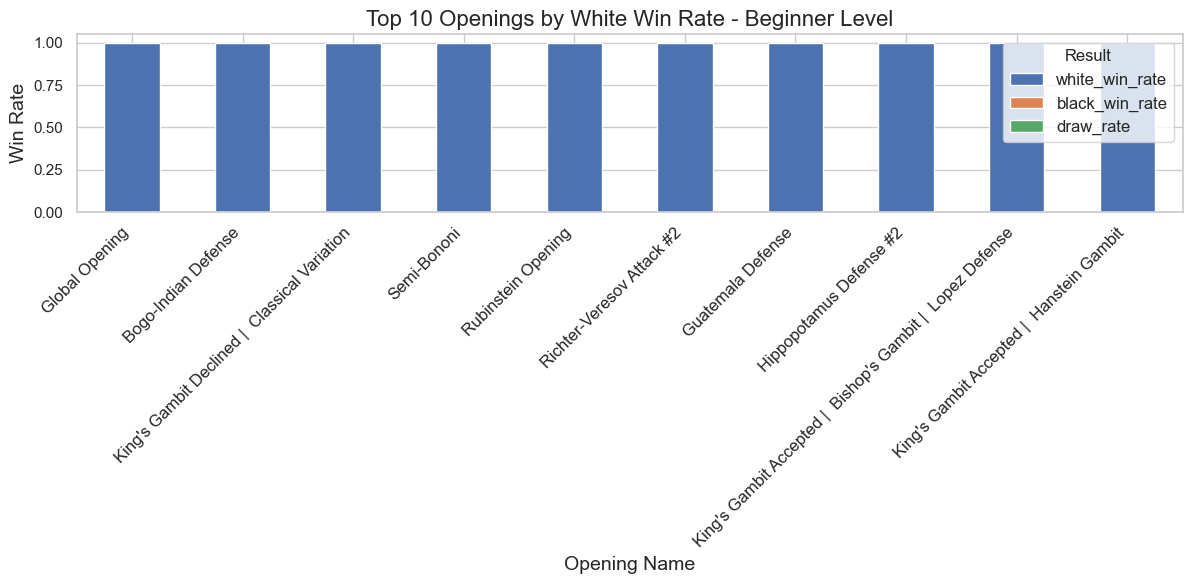

<Figure size 1200x600 with 0 Axes>

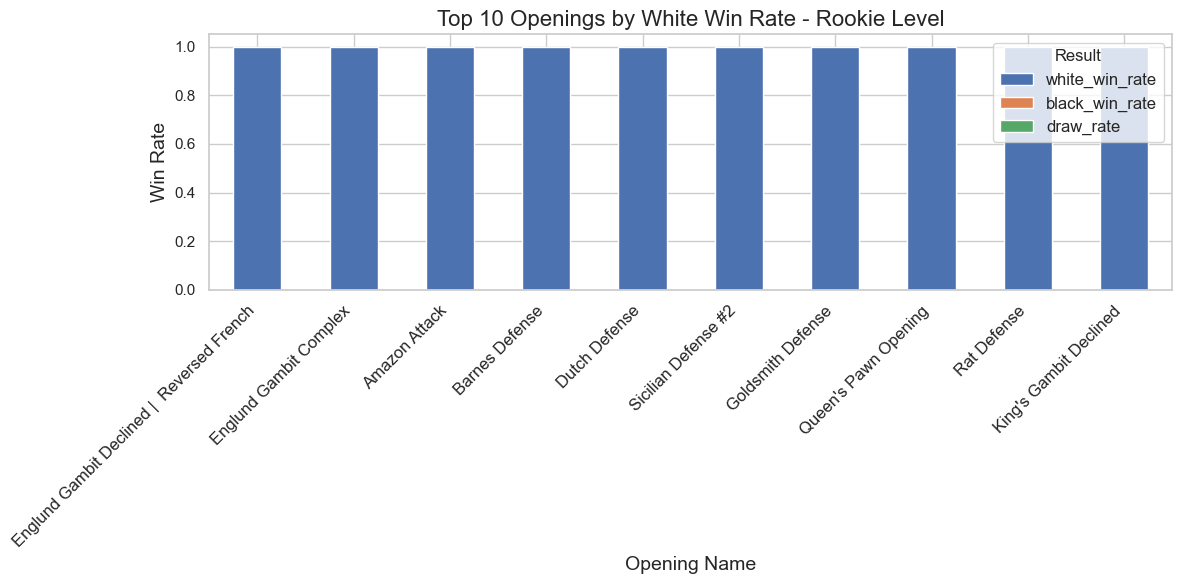

<Figure size 1200x600 with 0 Axes>

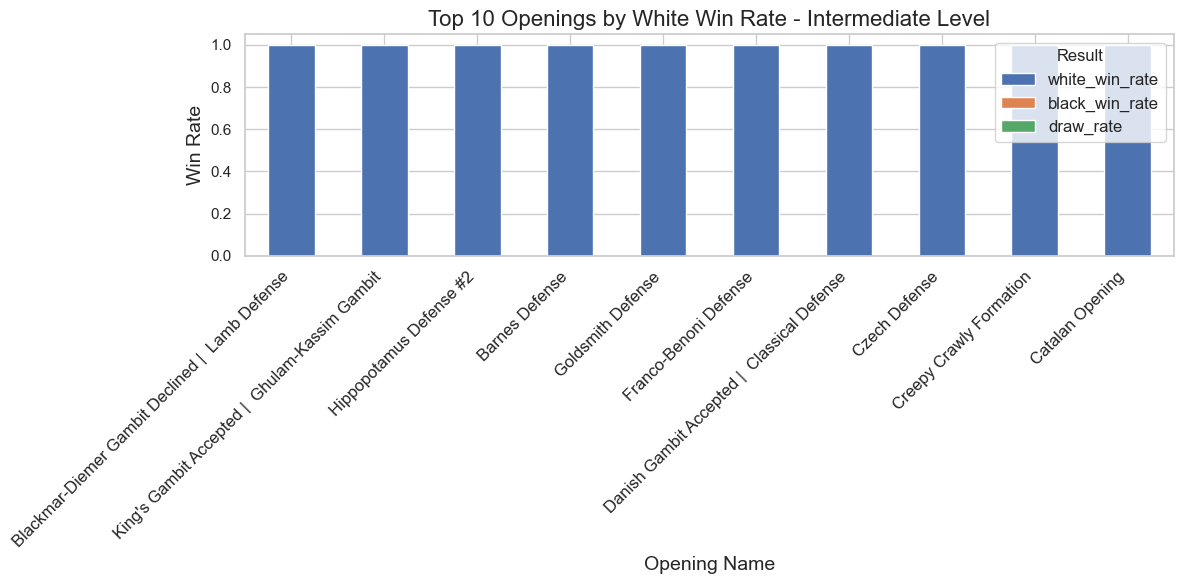

<Figure size 1200x600 with 0 Axes>

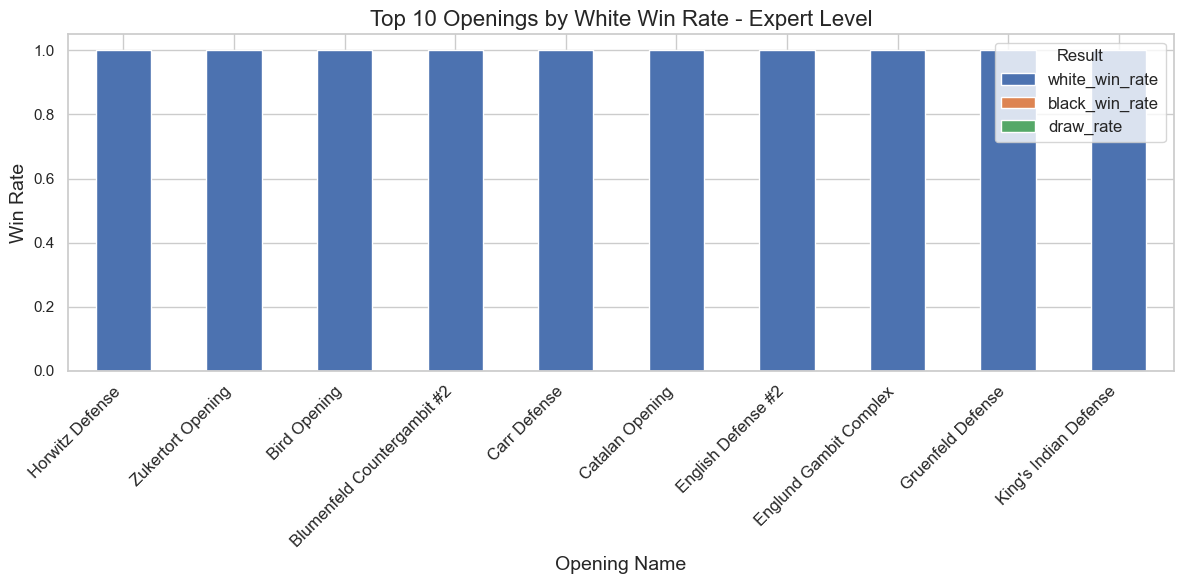

<Figure size 1200x600 with 0 Axes>

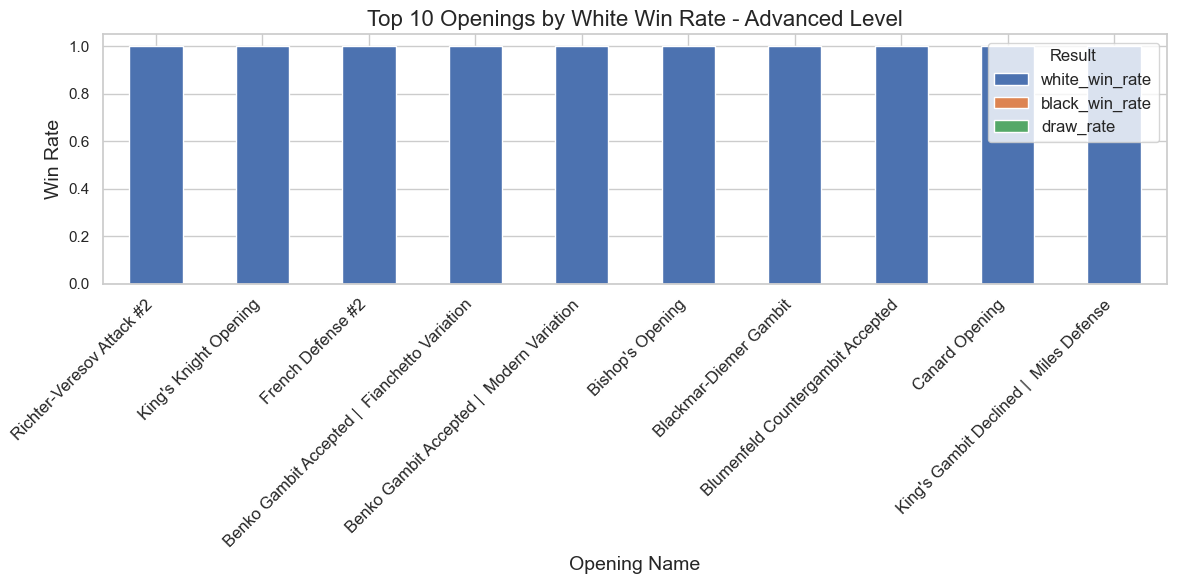

<Figure size 1200x600 with 0 Axes>

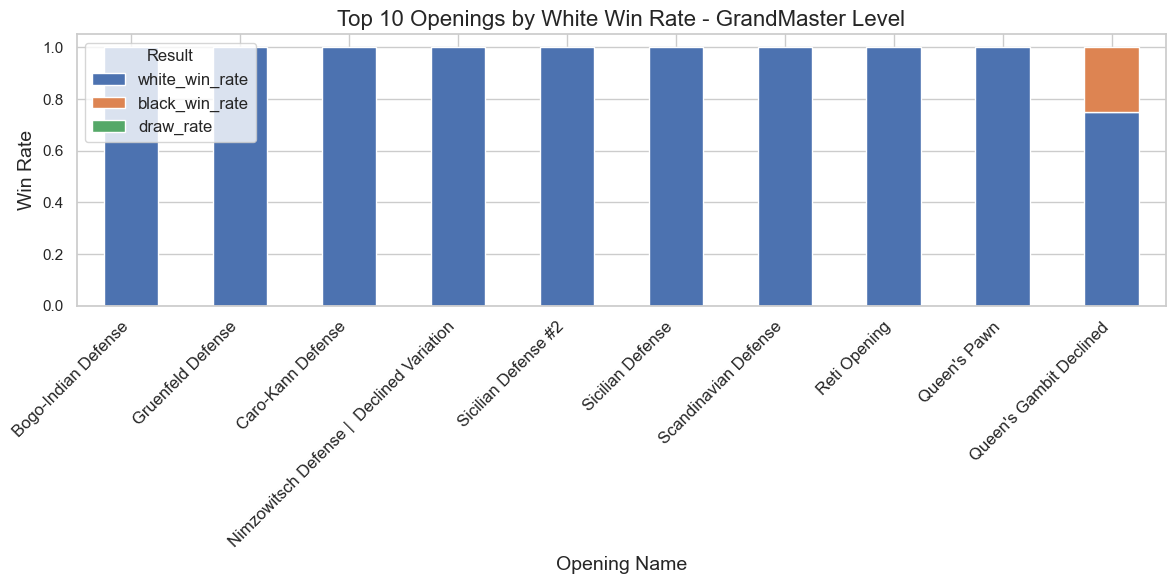

In [74]:
# white_levels = df['white level'].unique()
# opening_names = df['opening_name'].unique()
# print(opening_names.size)
# games_by_opening = df.groupby(['white level', 'opening_name', 'winner']).size().unstack().fillna(0).astype('int')

# games_by_opening['white_win_rate'] = games_by_opening['white'] / games_by_opening.sum(axis=1).astype('int')
# games_by_opening['black_win_rate'] = games_by_opening['black'] / games_by_opening.sum(axis=1).astype('int')
# games_by_opening['draw_rate'] = games_by_opening['draw'] / games_by_opening.sum(axis=1).astype('int')

# games_by_opening.sort_values(by='white_win_rate', ascending=False, inplace=True)

# for level in white_levels:
#     top_openings_by_level = (
#         games_by_opening.loc[level]
#         .sort_values(by='white_win_rate', ascending=False)
#         .head(10)
#     )
    
#     plt.figure(figsize=(12, 6))
#     top_openings_by_level[['white_win_rate', 'black_win_rate', 'draw_rate']].plot(
#         kind='bar', stacked=True, figsize=(12, 6)
#     )
    
#     plt.title(f"Top 10 Openings by White Win Rate - {level} Level", fontsize=16)
#     plt.xlabel("Opening Name", fontsize=14)
#     plt.ylabel("Win Rate", fontsize=14)
#     plt.xticks(rotation=45, ha='right', fontsize=12)
#     plt.legend(title="Result", fontsize=12)
#     plt.tight_layout()
    
#     plt.show()

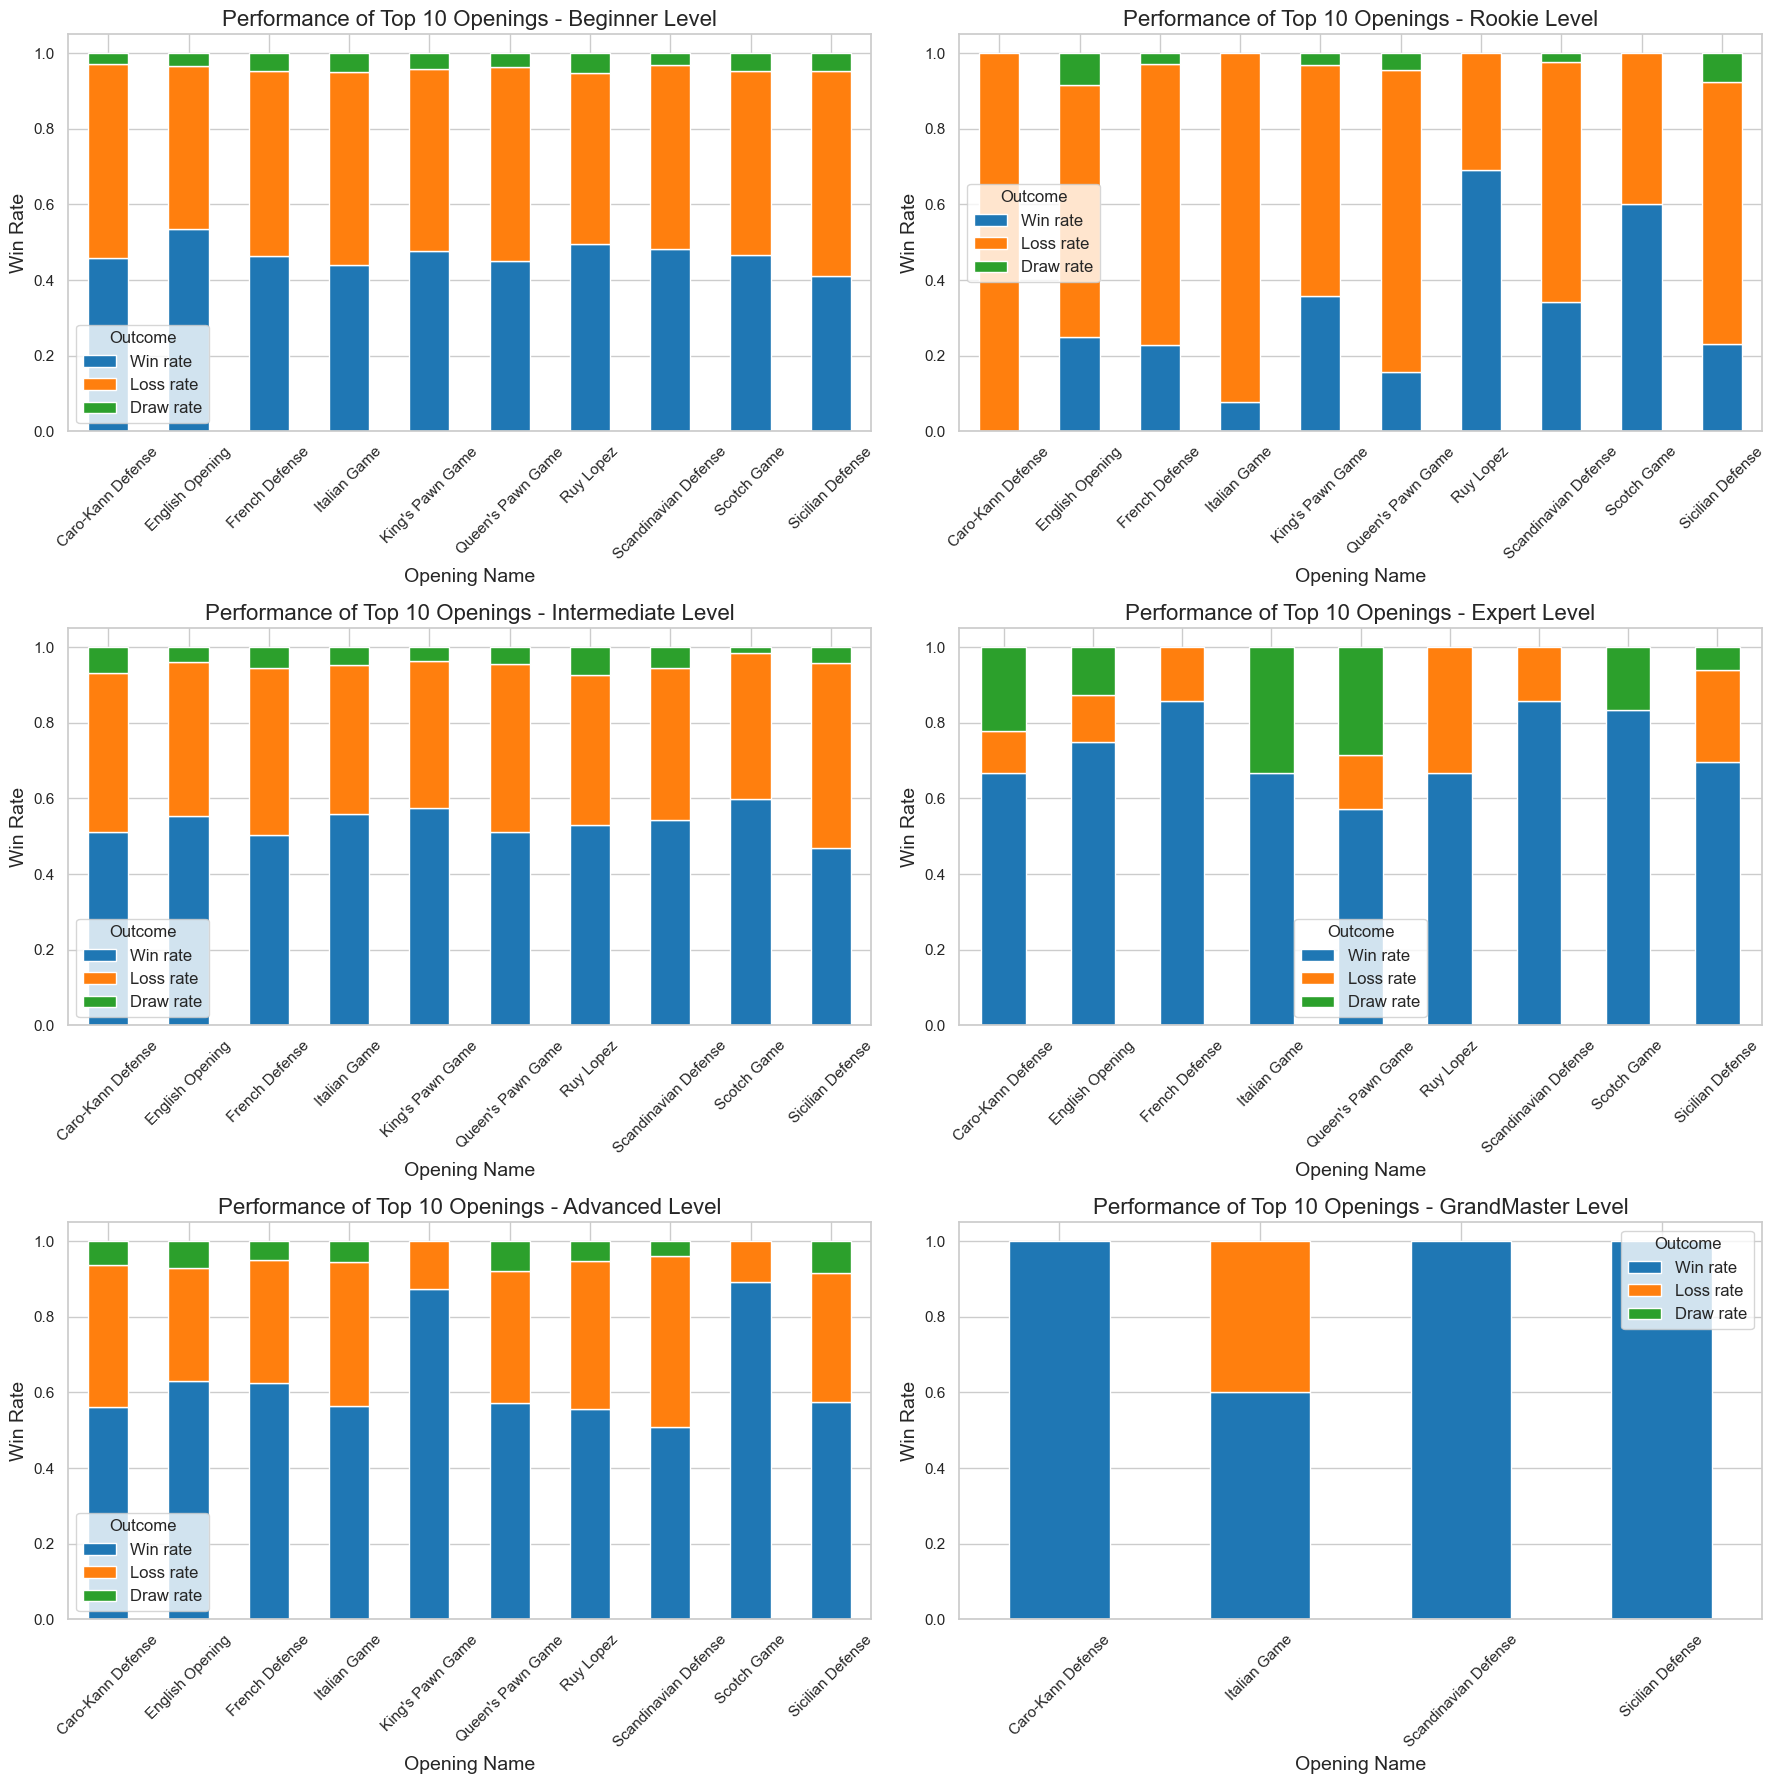

In [ ]:
top_openings = df['opening_name'].value_counts().head(10).index
white_levels = df['white level'].unique()

filtered_data = df[df['opening_name'].isin(top_openings)]


performance_by_level = (
    filtered_data.groupby(['white level', 'opening_name', 'winner'])
    .size()
    .unstack()
    .fillna(0)
    .astype('int')
)

performance_by_level['total_games'] = performance_by_level.sum(axis=1)
performance_by_level['white_win_rate'] = performance_by_level['white'] / performance_by_level['total_games']
performance_by_level['black_win_rate'] = performance_by_level['black'] / performance_by_level['total_games']
performance_by_level['draw_rate'] = performance_by_level['draw'] / performance_by_level['total_games']


fig, axes = plt.subplots(3, 2, figsize=(18, 6 * 3))

axes = axes.flatten()

for idx, level in enumerate(white_levels):
    level_data = performance_by_level.loc[level]
    
    # level_data_sorted = level_data.sort_values(by='white_win_rate', ascending=False)
    
    level_data[['white_win_rate', 'black_win_rate', 'draw_rate']].plot(
        kind='bar', 
        stacked=True, 
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
        ax=axes[idx]
    )
    
    axes[idx].set_title(f'Performance of Top 10 Openings - {level} Level', fontsize=16)
    axes[idx].set_xlabel('Opening Name', fontsize=14)
    axes[idx].set_ylabel('Win Rate', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(['Win rate', 'Loss rate', 'Draw rate'], title='Outcome', fontsize=12)

plt.tight_layout()
plt.show()


#### <span style='color:#2B9C15 '>üìâ Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho c√°c c√¢u h·ªèi </span>


S·∫Øp x·∫øp c√°c khai cu·ªôc theo white level v√† s·ªë l∆∞·ª£ng tr·∫≠n ƒë·∫•u (Games) theo th·ª© t·ª± gi·∫£m d·∫ßn, sau ƒë√≥ ch·ªçn 10 khai cu·ªôc ph·ªï bi·∫øn nh·∫•t cho m·ªói m·ª©c ƒë·ªô kinh nghi·ªám c·ªßa ng∆∞·ªùi ch∆°i c·ªù tr·∫Øng.

In [36]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=sorted_games,  
    x='Percentage of total games', 
    y='opening_name',  
    col='white level',  
    kind='bar', 
    palette='Blues_r', 
    height=6,  
    aspect=1.5,  
    col_wrap=2, 
    sharey=False  
)

g.set_titles("{col_name}")

g.set_axis_labels("Percentage of Total Games", "Opening Name")

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}")) 
    ax.set_xticks([i * 0.1 for i in range(0, 3)])  

    ax.set_xlim(0, 0.2)

plt.subplots_adjust(top=0.9)

g.fig.suptitle("Most Popular Openings by White Level", fontsize=16)

plt.show()

NameError: name 'sorted_games' is not defined

### **Nh·∫≠n x√©t T·ªïng Quan**

- **Sicilian Defense**:  
  Ph·ªï bi·∫øn nh·∫•t ·ªü m·ªçi c·∫•p ƒë·ªô, t·ª´ **Beginner** ƒë·∫øn **GrandMaster**, cho th·∫•y ƒë√¢y l√† khai cu·ªôc m·∫°nh v√† ƒë∆∞·ª£c ∆∞a chu·ªông.  
  L√Ω do khi·∫øn khai cu·ªôc n√†y ph·ªï bi·∫øn ·ªü m·ªçi c·∫•p ƒë·ªô l√† v√¨ n√≥ mang l·∫°i c∆° h·ªôi th·∫Øng cao cho ng∆∞·ªùi c·∫ßm qu√¢n ƒëen. Tuy nhi√™n, trong c·ªù vua, khi b·∫°n nh·∫≠n ƒë∆∞·ª£c l·ª£i th·∫ø ·ªü m·ªôt m·∫∑t n√†o ƒë√≥, b·∫°n c≈©ng ph·∫£i ch·∫•p nh·∫≠n r·ªßi ro l·ªõn h∆°n. V√¨ v·∫≠y, t·ª∑ l·ªá thua cu·ªôc khi s·ª≠ d·ª•ng khai cu·ªôc n√†y c≈©ng cao h∆°n.

- **Xu h∆∞·ªõng khai cu·ªôc v·ªõi 1.e4**:  
  M·ªôt xu h∆∞·ªõng r√µ r√†ng t·ª´ d·ªØ li·ªáu c·ªßa ch√∫ng ta l√†: **c·∫•p ƒë·ªô c√†ng cao, ng∆∞·ªùi ch∆°i c√†ng √≠t b·∫Øt ƒë·∫ßu v·ªõi n∆∞·ªõc 1.e4**.  
  - **1.e4** l√† n∆∞·ªõc ƒëi ƒë∆∞·ª£c khuy·∫øn ngh·ªã cho ng∆∞·ªùi m·ªõi b·∫Øt ƒë·∫ßu v√¨ n√≥ chi·∫øm lƒ©nh trung t√¢m v√† m·ªü ƒë∆∞·ªùng cho c·∫£ qu√¢n h·∫≠u v√† qu√¢n t∆∞·ª£ng.  
  - Trong **Top 10 khai cu·ªôc ph·ªï bi·∫øn** c·ªßa ng∆∞·ªùi ch∆°i c·∫•p th·∫•p, **8 khai cu·ªôc b·∫Øt ƒë·∫ßu v·ªõi 1.e4** (ngo·∫°i l·ªá l√† **Queen‚Äôs Pawn Game** v√† **English Opening**).  
  - ·ªû c·∫•p ƒë·ªô cao h∆°n, con s·ªë n√†y gi·∫£m xu·ªëng c√≤n **6** (th√™m **Indian Game** v√† **Queen‚Äôs Gambit Declined** v√†o danh s√°ch ngo·∫°i l·ªá).  
  - ·ªû c·∫•p ƒë·ªô **GrandMaster**, con s·ªë n√†y ch·ªâ c√≤n **5** (ngo·∫°i l·ªá m·ªõi bao g·ªìm **Zukertort Opening** v√† **King‚Äôs Indian Defense**).

- **C·∫•p ƒë·ªô cao (GrandMaster, Expert)**:  
  Xu h∆∞·ªõng s·ª≠ d·ª•ng c√°c khai cu·ªôc ph·ª©c t·∫°p v√† chi·∫øn l∆∞·ª£c nh∆∞ **Italian Game**, **Caro-Kann Defense**, v√† **Queen's Gambit Declined**.

- **C·∫•p ƒë·ªô th·∫•p (Rookie, Beginner)**:  
  C√°c khai cu·ªôc ƒë∆°n gi·∫£n v√† c∆° b·∫£n nh∆∞ **King's Pawn Game**, **Queen's Pawn Game**, v√† **Van't Kruijs Opening** ƒë∆∞·ª£c ∆∞a chu·ªông.

---

### **C√°c khai cu·ªôc kh√¥ng ph·ªï bi·∫øn ·ªü c·∫•p ƒë·ªô th·∫•p**

M·∫∑c d√π c√°c danh s√°ch c√≥ nhi·ªÅu ƒëi·ªÉm t∆∞∆°ng ƒë·ªìng, **khai cu·ªôc ph·ªï bi·∫øn h∆°n ·ªü c√°c tr·∫≠n ƒë·∫•u c·∫•p th·∫•p**:


#### **King‚Äôs Pawn Game**

Nh∆∞ t√™n g·ªçi, khai cu·ªôc n√†y li√™n quan ƒë·∫øn vi·ªác di chuy·ªÉn t·ªët Vua (t·ªët e2 cho qu√¢n tr·∫Øng). Tuy nhi√™n, c√°c tr·∫≠n ƒë·∫•u ƒë∆∞·ª£c x·∫øp v√†o danh m·ª•c n√†y l√† nh·ªØng tr·∫≠n c√≥ c√°c n∆∞·ªõc ƒëi khai cu·ªôc **kh√¥ng ph·ªï bi·∫øn**.

H·∫ßu h·∫øt c√°c khai cu·ªôc quen thu·ªôc nh∆∞ **Sicilian Defense**, **Scandinavian Defense**, **Ruy Lopez**, v√† **Italian Game** c≈©ng li√™n quan ƒë·∫øn vi·ªác di chuy·ªÉn t·ªët Vua, nh∆∞ng danh m·ª•c n√†y ch·ªâ bao g·ªìm c√°c n∆∞·ªõc ƒëi ti·∫øp theo **kh√¥ng th∆∞·ªùng g·∫∑p**.

V√≠ d·ª• v·ªÅ hai n∆∞·ªõc ƒëi kh√¥ng ph·ªï bi·∫øn trong King‚Äôs Pawn Game:
- **V√≠ d·ª• 1**: 1.e4 e5 2.Qh5?!  
  N∆∞·ªõc ƒëi n√†y khi·∫øn qu√¢n h·∫≠u d·ªÖ d√†ng b·ªã t·∫•n c√¥ng b·ªüi 2...Nc6 v√† ti·∫øp theo l√† 3...Nf6. Nguy√™n t·∫Øc chung l√† n√™n ph√°t tri·ªÉn c√°c qu√¢n nh·∫π tr∆∞·ªõc khi ƒë∆∞a qu√¢n h·∫≠u v√†o cu·ªôc ch∆°i.

- **V√≠ d·ª• 2**: 1.e4 e5 2.d3?!  
  N∆∞·ªõc ƒëi n√†y ch·∫∑n ƒë∆∞·ªùng ph√°t tri·ªÉn c·ªßa qu√¢n t∆∞·ª£ng tr√™n f1 v√† qu√° b·∫£o v·ªá √¥ e4, trong khi √¥ n√†y kh√¥ng th·ª±c s·ª± b·ªã ƒëe d·ªça. Tr·∫Øng c√≥ th·ªÉ l√†m t·ªët h∆°n b·∫±ng c√°ch ph√°t tri·ªÉn qu√¢n m√£ ho·∫∑c qu√¢n t∆∞·ª£ng.


### **Nh·∫≠n x√©t**  
- Khi c·∫•p ƒë·ªô tƒÉng l√™n, c√°c khai cu·ªôc tr·ªü n√™n **ph·ª©c t·∫°p h∆°n** v√† ƒë∆∞·ª£c l·ª±a ch·ªçn m·ªôt c√°ch chi·∫øn l∆∞·ª£c.  
- V√≠ d·ª•: **Sicilian Defense**, **Caro-Kann Defense**, v√† **Queen's Gambit Declined** th∆∞·ªùng xu·∫•t hi·ªán ·ªü c√°c c·∫•p ƒë·ªô cao.  
- Ng∆∞·ª£c l·∫°i, c√°c khai cu·ªôc ƒë∆°n gi·∫£n h∆°n nh∆∞ **King's Pawn Game** v√† **Philidor Defense** th∆∞·ªùng ph·ªï bi·∫øn ·ªü c·∫•p ƒë·ªô th·∫•p do t√≠nh d·ªÖ h·ªçc v√† √≠t l√Ω thuy·∫øt.



## Question 5: What are the best openings for white and black?


#### <span style='color:#2B9C15 '>üõ† Ti·ªÅn x·ª≠ l√Ω </span>


1. Nh√≥m d·ªØ li·ªáu theo winner condition v√† opening_name, t√≠nh s·ªë l∆∞·ª£ng tr·∫≠n ƒë·∫•u.
2. T√≠nh t·ªïng s·ªë tr·∫≠n ƒë·∫•u cho m·ªói khai cu·ªôc v√† t·ª∑ l·ªá ph·∫ßn trƒÉm tr·∫≠n ƒë·∫•u cho t·ª´ng khai cu·ªôc.
3. L·ªçc c√°c khai cu·ªôc c√≥ t·ªïng s·ªë tr·∫≠n ƒë·∫•u > 50.

In [ ]:
res_by_opening = clean_df.groupby(['winner condition', 'opening_name'], as_index=False).size()
res_by_opening.rename(columns={'size': 'Games'}, inplace=True)

res_by_opening['Total_games'] = res_by_opening.groupby('opening_name')['Games'].transform('sum')

res_by_opening['Games percent'] = res_by_opening['Games'] / res_by_opening['Total_games']

res_by_opening = res_by_opening[res_by_opening['Total_games'] > 50]

best_for_white = res_by_opening[res_by_opening['winner condition'] == 'higher rating'].nlargest(10, 'Games percent')
best_for_black = res_by_opening[res_by_opening['winner condition'] == 'lower rating'].nlargest(10, 'Games percent')

#### <span style='color:#2B9C15 '>üìâ Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho c√°c c√¢u h·ªèi </span>


1. Ch·ªçn Top 10 khai cu·ªôc cho White v√† Black:

- L·ªçc c√°c khai cu·ªôc c√≥ t·ª∑ l·ªá th·∫Øng cao nh·∫•t cho ng∆∞·ªùi ch∆°i tr·∫Øng (higher rating) v√† ƒëen (lower rating) t·ª´ d·ªØ li·ªáu ƒë√£ l·ªçc.
2. V·∫Ω bi·ªÉu ƒë·ªì:

- S·ª≠ d·ª•ng h√†m openings_plot ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì thanh cho c√°c khai cu·ªôc c√≥ t·ª∑ l·ªá th·∫Øng cao nh·∫•t cho ng∆∞·ªùi ch∆°i tr·∫Øng v√† ƒëen, ph√¢n bi·ªát b·∫±ng m√†u s·∫Øc: M√†u "grey" cho tr·∫Øng th·∫Øng, "black" cho ƒëen th·∫Øng.

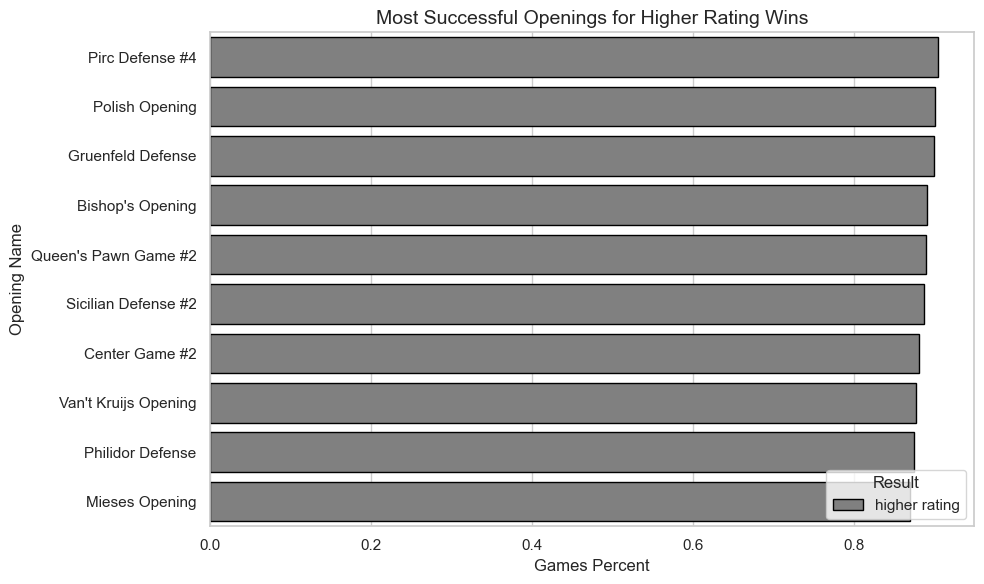

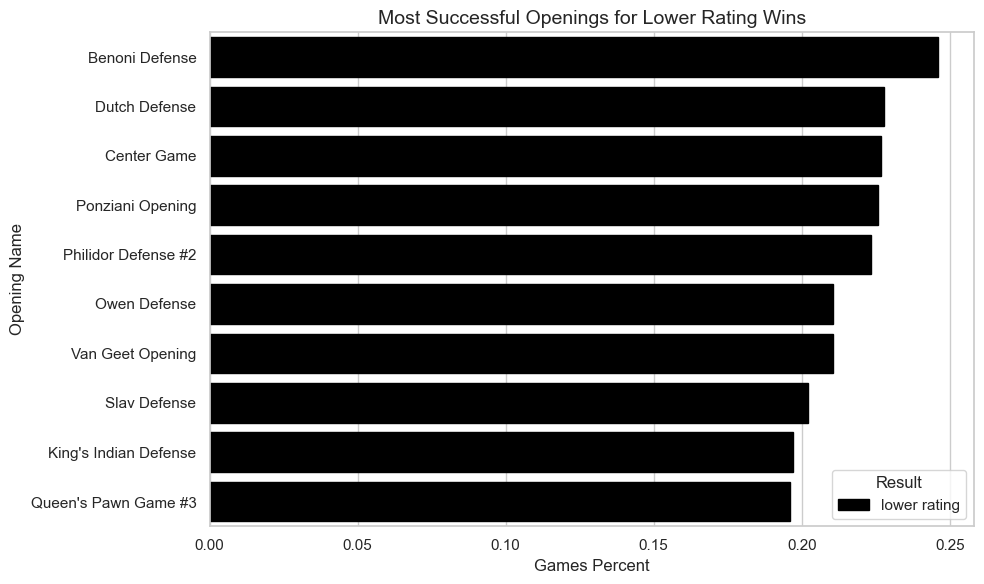

In [ ]:
def openings_plot(dataset, title, color_map):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=dataset,
        x='Games percent',
        y='opening_name',
        hue='winner condition',
        dodge=False,
        palette=color_map,
        edgecolor="black"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Games Percent")
    plt.ylabel("Opening Name")
    plt.legend(title="Result", loc="lower right")
    plt.tight_layout()
    plt.show()

color_map = {"higher rating": "grey", "lower rating": "black", "draw": "grey"}

openings_plot(best_for_white, "Most Successful Openings for Higher Rating Wins", color_map)

openings_plot(best_for_black, "Most Successful Openings for Lower Rating Wins", color_map)

## Question 7: Which openings are common when a player wins due to resignation?

#### <span style='color:#2B9C15 '>üõ† Ti·ªÅn x·ª≠ l√Ω </span>

- Tr√≠ch xu·∫•t c√°c tr·∫≠n ƒë·∫•u c√≥ ƒëi·ªÅu ki·ªán chi·∫øn th·∫Øng l√† t·ª´ b·ªè (victory_status == 'resign').
- Nh√≥m theo t√™n khai cu·ªôc v√† ƒë·∫øm s·ªë tr·∫≠n th·∫Øng b·∫±ng t·ª´ b·ªè.
- S·∫Øp x·∫øp v√† ch·ªçn ra 10 khai cu·ªôc c√≥ s·ªë tr·∫≠n th·∫Øng t·ª´ b·ªè nhi·ªÅu nh·∫•t.

In [ ]:
resign_games = clean_df[clean_df['victory_status'] == 'resign']

resign_by_opening = resign_games.groupby('opening_name', as_index=False).size()
resign_by_opening.rename(columns={'size': 'Resign Wins'}, inplace=True)

top_resign_openings = resign_by_opening.nlargest(10, 'Resign Wins')

#### <span style='color:#2B9C15 '>üìâ Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho c√°c c√¢u h·ªèi </span>


- Use a horizontal bar chart to visualize the top 10 openings leading to wins by resignation.

- S·ª≠ d·ª•ng bi·ªÉu ƒë·ªì c·ªôt n·∫±m ngang ƒë·ªÉ tr·ª±c quan h√≥a top 10 khai cu·ªôc c√≥ kh·∫£ nƒÉng d·∫´n ƒë·∫øn chi·∫øn th·∫Øng b·∫±ng c√°ch ƒë·∫ßu h√†ng

C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\361677644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


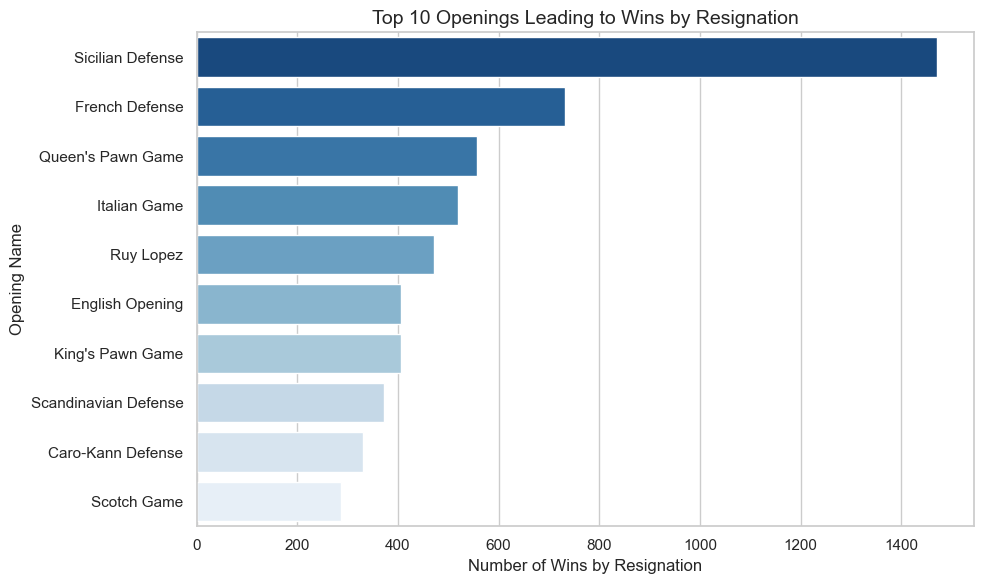

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_resign_openings,
    x='Resign Wins',
    y='opening_name',
    palette='Blues_r'
)

plt.title("Top 10 Openings Leading to Wins by Resignation", fontsize=14)
plt.xlabel("Number of Wins by Resignation", fontsize=12)
plt.ylabel("Opening Name", fontsize=12)

plt.tight_layout()
plt.show()

## Question 8:  Which first moves provide an advantage for each player?

#### <span style='color:#2B9C15 '>üõ† Ti·ªÅn x·ª≠ l√Ω </span>

- Nh√≥m d·ªØ li·ªáu theo m√£ khai cu·ªôc (opening_eco) v√† k·∫øt qu·∫£ tr·∫≠n ƒë·∫•u (winner), t√≠nh s·ªë l∆∞·ª£ng tr·∫≠n ƒë·∫•u cho m·ªói k·∫øt h·ª£p.

- T√≠nh t·ªïng s·ªë tr·∫≠n ƒë·∫•u cho m·ªói khai cu·ªôc v√† l∆∞u v√†o c·ªôt total_games.

- L·ªçc l·∫•y Top 20 khai cu·ªôc ph·ªï bi·∫øn nh·∫•t d·ª±a tr√™n t·ªïng s·ªë tr·∫≠n ƒë·∫•u.

- T√≠nh t·ª∑ l·ªá ph·∫ßn trƒÉm s·ªë tr·∫≠n th·∫Øng cho m·ªói b√™n (Tr·∫Øng ho·∫∑c ƒêen) trong c√°c khai cu·ªôc ph·ªï bi·∫øn.

- D·ªØ li·ªáu ƒë∆∞·ª£c pivot l·∫°i ƒë·ªÉ c√≥ d·∫°ng b·∫£ng v·ªõi opening_eco l√† ch·ªâ m·ª•c v√† c√°c k·∫øt qu·∫£ (winner) l√† c√°c c·ªôt, ch·ª©a t·ª∑ l·ªá ph·∫ßn trƒÉm th·∫Øng.


In [ ]:
chess_summary = (
    clean_df.groupby(['opening_eco', 'winner'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

chess_summary['total_games'] = chess_summary.groupby('opening_eco')['count'].transform('sum')

top_10_openings = chess_summary.groupby('opening_eco')['total_games'].max().nlargest(20).index
filtered_chess_summary = chess_summary[chess_summary['opening_eco'].isin(top_10_openings)]

filtered_chess_summary['percent'] = filtered_chess_summary.groupby('opening_eco')['count'].transform(lambda x: x / x.sum())

pivot_data = filtered_chess_summary.pivot(index='opening_eco', columns='winner', values='percent').fillna(0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\615184035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_chess_summary['percent'] = filtered_chess_summary.groupby('opening_eco')['count'].transform(lambda x: x / x.sum())


#### <span style='color:#2B9C15 '>üìâ Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho c√°c c√¢u h·ªèi </span>


- V·∫Ω bi·ªÉu ƒë·ªì Stacked Bar Chart th·ªÉ hi·ªán t·ª∑ l·ªá ph·∫ßn trƒÉm chi·∫øn th·∫Øng c·ªßa Tr·∫Øng v√† ƒêen cho c√°c khai cu·ªôc ph·ªï bi·∫øn.
- M·ªói thanh bi·ªÉu ƒë·ªì th·ªÉ hi·ªán t·ª∑ l·ªá ph·∫ßn trƒÉm th·∫Øng cho Tr·∫Øng v√† ƒêen trong m·ªôt khai cu·ªôc.
- V·∫Ω ƒë∆∞·ªùng k·∫ª d·ªçc ƒë·ªÉ ph√¢n chia t·ª∑ l·ªá th·∫Øng c·ªßa Tr·∫Øng v√† ƒêen.

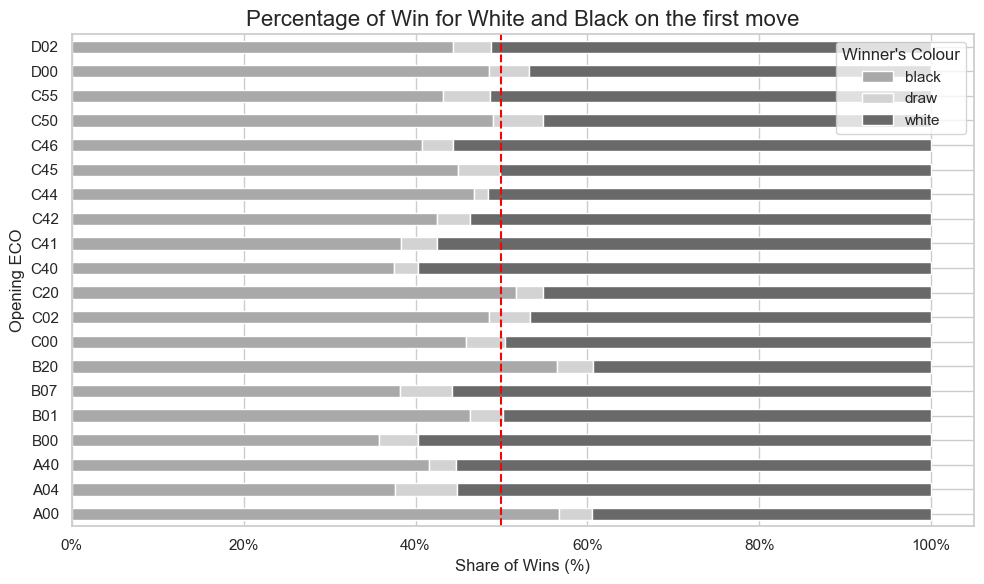

In [ ]:
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#a9a9a9', '#d3d3d3', '#696969']  
)
plt.axvline(0.5, color='red', linestyle='dashed', linewidth=1.5)
plt.title("Percentage of Win for White and Black on the first move", fontsize=16)
plt.xlabel("Share of Wins (%)", fontsize=12)
plt.ylabel("Opening ECO", fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  
plt.legend(title="Winner's Colour")
plt.tight_layout()
plt.show()

## Question 9:  How does the rating difference affect the outcome of a game?

#### <span style='color:#2B9C15 '>üõ† Ti·ªÅn x·ª≠ l√Ω </span>

- S·ª≠ d·ª•ng c√°c kho·∫£ng gi√° tr·ªã c·ªßa Rating_Diff ƒë·ªÉ chia th√†nh c√°c nh√≥m rating (v√≠ d·ª•: 0-50, 51-100, ...). T·∫°o c·ªôt Rating_Group ƒë·ªÉ l∆∞u nh√≥m rating cho m·ªói tr·∫≠n ƒë·∫•u.

- Nh√≥m d·ªØ li·ªáu theo Rating_Group v√† winner condition, sau ƒë√≥ t√≠nh s·ªë l∆∞·ª£ng tr·∫≠n ƒë·∫•u cho m·ªói nh√≥m.

- T√≠nh t·ªïng s·ªë tr·∫≠n ƒë·∫•u trong m·ªói nh√≥m rating ƒë·ªÉ chu·∫©n h√≥a t·ª∑ l·ªá ph·∫ßn trƒÉm.

- T√≠nh t·ª∑ l·ªá ph·∫ßn trƒÉm s·ªë tr·∫≠n th·∫Øng cho m·ªói nh√≥m rating v√† k·∫øt qu·∫£ (Tr·∫Øng, ƒêen, H√≤a).

- Chuy·ªÉn d·ªØ li·ªáu th√†nh d·∫°ng b·∫£ng (pivot table) ƒë·ªÉ c√≥ Rating_Group l√† ch·ªâ m·ª•c v√† c√°c k·∫øt qu·∫£ (winner condition) l√† c√°c c·ªôt, ch·ª©a t·ª∑ l·ªá ph·∫ßn trƒÉm chi·∫øn th·∫Øng.

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]  
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 
          '251-300', '301-350', '351-400', '401-450', '>450']
clean_df['Rating_Group'] = pd.cut(clean_df['Rating_Diff'], bins=bins, labels=labels, right=False)

rating_summary = (
    clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')

rating_summary['percent'] = rating_summary['count'] / rating_summary['total_games']

pivot_data = rating_summary.pivot(index='Rating_Group', columns='winner condition', values='percent').fillna(0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\3721445698.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\3721445698.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')


#### <span style='color:#2B9C15 '>üìâ Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho c√°c c√¢u h·ªèi </span>

- V·∫Ω bi·ªÉu ƒë·ªì Stacked Bar Chart th·ªÉ hi·ªán t·ª∑ l·ªá ph·∫ßn trƒÉm chi·∫øn th·∫Øng (tr·∫Øng, ƒëen, h√≤a) cho m·ªói nh√≥m rating.

- Th√™m c√°c y·∫øu t·ªë nh∆∞ ti√™u ƒë·ªÅ, nh√£n tr·ª•c, ƒë·ªãnh d·∫°ng ph·∫ßn trƒÉm cho tr·ª•c Y, v√† thi·∫øt l·∫≠p v·ªã tr√≠ c·ªßa legend ƒë·ªÉ bi·ªÉu ƒë·ªì d·ªÖ hi·ªÉu h∆°n.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\828171807.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\828171807.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')


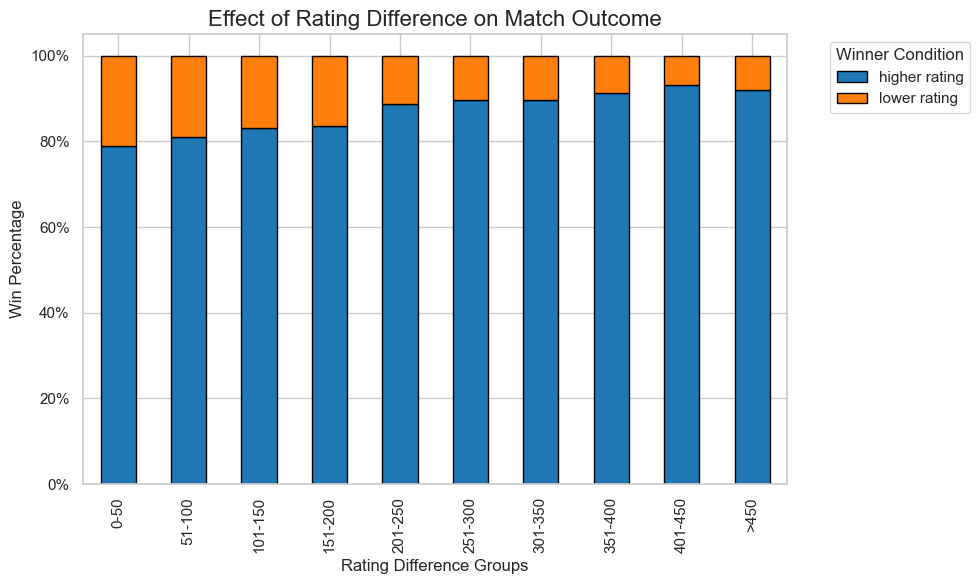

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]  
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 
          '251-300', '301-350', '351-400', '401-450', '>450']
clean_df['Rating_Group'] = pd.cut(clean_df['Rating_Diff'], bins=bins, labels=labels, right=False)

rating_summary = (
    clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')

rating_summary['percent'] = rating_summary['count'] / rating_summary['total_games']

pivot_data = rating_summary.pivot(index='Rating_Group', columns='winner condition', values='percent').fillna(0)

ax = pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
    edgecolor="black"
)

plt.title("Effect of Rating Difference on Match Outcome", fontsize=16)
plt.xlabel("Rating Difference Groups", fontsize=12)
plt.ylabel("Win Percentage", fontsize=12)
plt.legend(title="Winner Condition", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))  
plt.tight_layout()

plt.show()

## Question 10: How does the base time affect the result of the game (win/loss/draw)?

#### <span style='color:#2B9C15 '>üõ† Ti·ªÅn x·ª≠ l√Ω </span>

- Ch·ªçn c√°c tr·∫≠n ƒë·∫•u c√≥ base_time nh·ªè h∆°n 31 ph√∫t.

- Nh√≥m d·ªØ li·ªáu theo th·ªùi gian c∆° b·∫£n (base_time) v√† k·∫øt qu·∫£ tr·∫≠n ƒë·∫•u (winner), sau ƒë√≥ t√≠nh s·ªë l∆∞·ª£ng tr·∫≠n ƒë·∫•u cho m·ªói nh√≥m.

- T√≠nh t·ªïng s·ªë tr·∫≠n ƒë·∫•u cho t·ª´ng gi√° tr·ªã base_time v√† chu·∫©n h√≥a t·ª∑ l·ªá ph·∫ßn trƒÉm s·ªë tr·∫≠n th·∫Øng c·ªßa m·ªói k·∫øt qu·∫£ (Tr·∫Øng, ƒêen, H√≤a).

- Pivot d·ªØ li·ªáu ƒë·ªÉ c√≥ d·∫°ng b·∫£ng v·ªõi base_time l√† ch·ªâ m·ª•c v√† c√°c k·∫øt qu·∫£ (winner) l√† c√°c c·ªôt, ch·ª©a t·ª∑ l·ªá ph·∫ßn trƒÉm chi·∫øn th·∫Øng.

In [ ]:
filtered_df = clean_df[clean_df['base_time'] < 31]


base_time_summary = (
    filtered_df.groupby(['base_time', 'winner'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

base_time_summary['total_games'] = base_time_summary.groupby('base_time')['count'].transform('sum')
base_time_summary['percent'] = base_time_summary['count'] / base_time_summary['total_games']

pivot_data = base_time_summary.pivot(index='base_time', columns='winner', values='percent').fillna(0)

#### <span style='color:#2B9C15 '>üìâ Ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tr·∫£ l·ªùi cho c√°c c√¢u h·ªèi </span>

- V·∫Ω bi·ªÉu ƒë·ªì Stacked Bar Chart ngang th·ªÉ hi·ªán t·ª∑ l·ªá ph·∫ßn trƒÉm chi·∫øn th·∫Øng c·ªßa m·ªói k·∫øt qu·∫£ (Tr·∫Øng, ƒêen, H√≤a) theo th·ªùi gian c∆° b·∫£n (base_time).

- Th√™m c√°c y·∫øu t·ªë nh∆∞ ti√™u ƒë·ªÅ, nh√£n tr·ª•c, ƒë·ªãnh d·∫°ng ph·∫ßn trƒÉm cho tr·ª•c X, v√† k·∫ª ƒë∆∞·ªùng d·ªçc t·∫°i 50% ƒë·ªÉ l√†m r√µ s·ª± ph√¢n chia gi·ªØa c√°c k·∫øt qu·∫£.

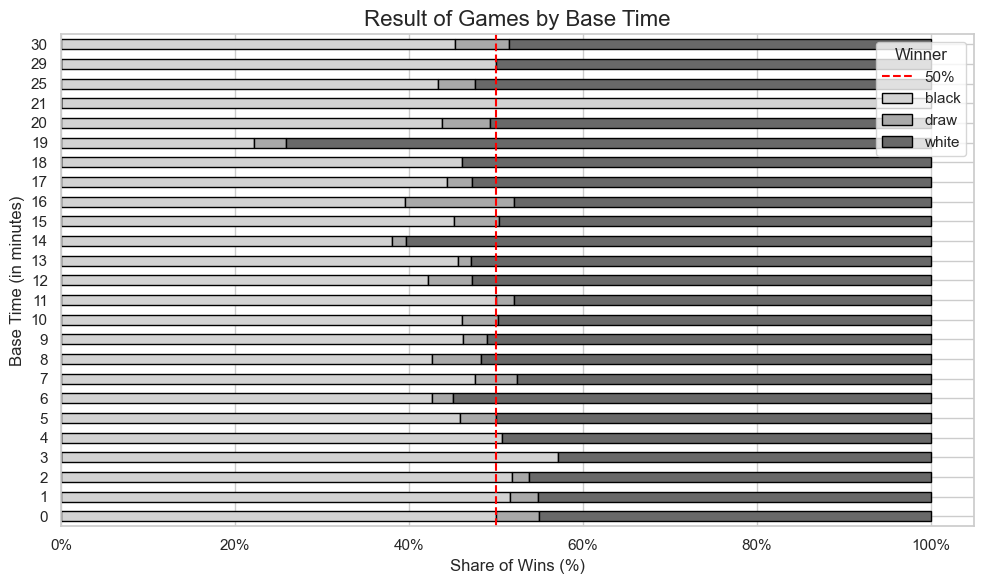

In [ ]:
ax = pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#d3d3d3', '#a9a9a9', '#696969'],  
    edgecolor="black"
)

plt.axvline(0.5, color='red', linestyle='dashed', linewidth=1.5, label='50%')

plt.title("Result of Games by Base Time", fontsize=16)
plt.xlabel("Share of Wins (%)", fontsize=12)
plt.ylabel("Base Time (in minutes)", fontsize=12)
plt.legend(title="Winner")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  
plt.tight_layout()

plt.show()